#SUBTHEME SENTIMENT ANALYSIS USING NLP CONCEPT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def remove_empty_and_space(text):
    return [lab.strip() for lab in text if lab]

df = pd.read_csv('/content/Evaluation-dataset.csv', header=None).fillna('')
df.columns = ['text'] + [f'label_{i}' for i in range(1, 15)]

df['target'] = df.iloc[:, 1:15].values.tolist()
df['target'] = df['target'].map(remove_empty_and_space)
df = df[['text', 'target']]
df['target_counts'] = df['target'].apply(len)

print(f"There are {df.shape[0]} Rows in Data")

There are 10132 Rows in Data


In [ ]:
df.head()

,text,target,target_counts
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...",2
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2
2,Very easy to use and good value for money.,[value for money positive],1
3,Really easy and convenient to arrange,[ease of booking positive],1
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           10132 non-null  object
 1   target         10132 non-null  object
 2   target_counts  10132 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 237.6+ KB


In [ ]:
df.describe()

,target_counts
count,10132.000000
mean,1.435551
std,1.123282
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def extract_subthemes(text):
    doc = nlp(text)
    subthemes = [chunk.text for chunk in doc.noun_chunks]
    return subthemes

# Apply the function to extract subthemes
df['subthemes'] = df['cleaned_text'].apply(extract_subthemes)


In [ ]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_analysis = pipeline('sentiment-analysis')

def analyze_sentiment(subthemes):
    sentiments = []
    for subtheme in subthemes:
        result = sentiment_analysis(subtheme)[0]
        sentiments.append((subtheme, result['label']))
    return sentiments

# Apply sentiment analysis to subthemes
df['subtheme_sentiments'] = df['subthemes'].apply(analyze_sentiment)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
 # Flatten the subtheme sentiments into a DataFrame
subtheme_sentiments = []

for _, row in df.iterrows():
    for subtheme, sentiment in row['subtheme_sentiments']:
        subtheme_sentiments.append({'review': row['text'], 'subtheme': subtheme, 'sentiment': sentiment})

subtheme_df = pd.DataFrame(subtheme_sentiments)

# Display the first few rows of the subtheme sentiment DataFrame
print(subtheme_df.head())


                                              review              subtheme  \
0  Tires where delivered to the garage of my choi...                 tires   
1  Tires where delivered to the garage of my choi...  garage choice garage   
2  Tires where delivered to the garage of my choi...       arranged garage   
3  Easy Tyre Selection Process, Competitive Prici...   competitive pricing   
4         Very easy to use and good value for money.      good value money   

  sentiment  
0  NEGATIVE  
1  POSITIVE  
2  NEGATIVE  
3  POSITIVE  
4  POSITIVE  


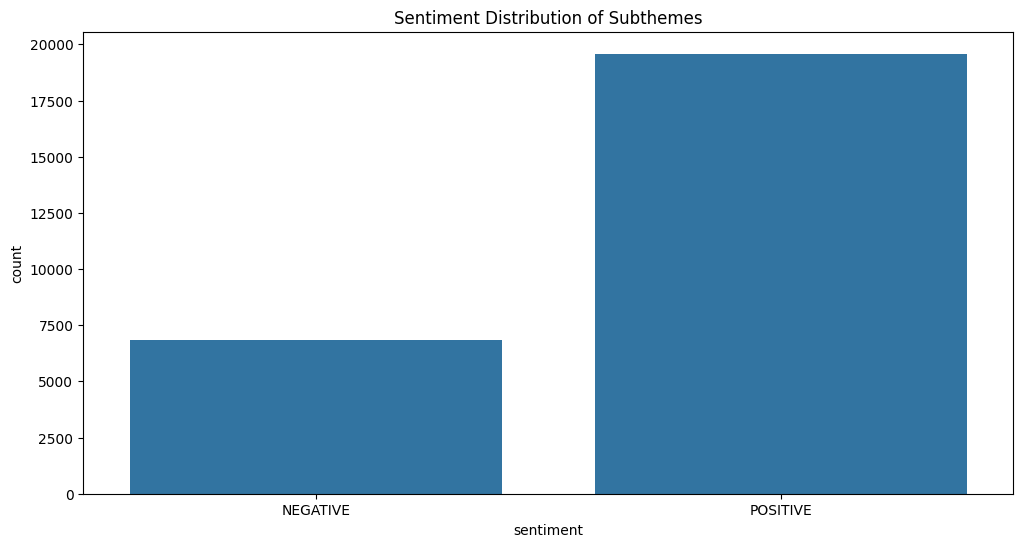

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution for subthemes
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=subtheme_df)
plt.title('Sentiment Distribution of Subthemes')
plt.show()
